In [1]:
import pandas as pd 

In [2]:
housing = pd.read_csv('./housing.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
categorical_attribute = ['ocean_proximity']

In [7]:
numerical_attributes = [i for i in housing.columns if i not in categorical_attribute]

In [8]:
numerical_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

In [11]:
categorical_attribute_num = label_encoder.fit_transform(housing[categorical_attribute])

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
import numpy as np
np.unique(categorical_attribute_num,return_counts=True)

(array([0, 1, 2, 3, 4]), array([9136, 6551,    5, 2290, 2658], dtype=int64))

In [13]:
categorical_attribute_num = label_encoder.transform

In [14]:
housing_trans = pd.concat([housing[numerical_attributes],pd.DataFrame(data=categorical_attribute_num,columns=['ocean_proximity'])], axis=1)

ValueError: DataFrame constructor not properly called!

In [ ]:
housing_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [ ]:
corr_matrix = housing_trans.corr()

In [ ]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000


<Axes: >

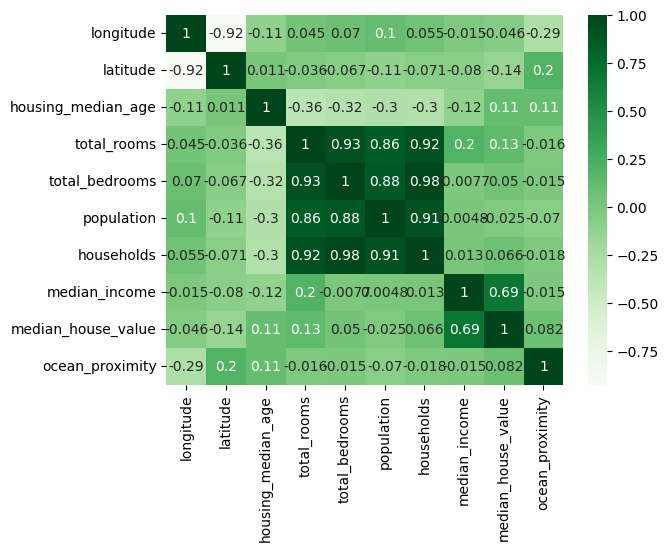

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')



In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

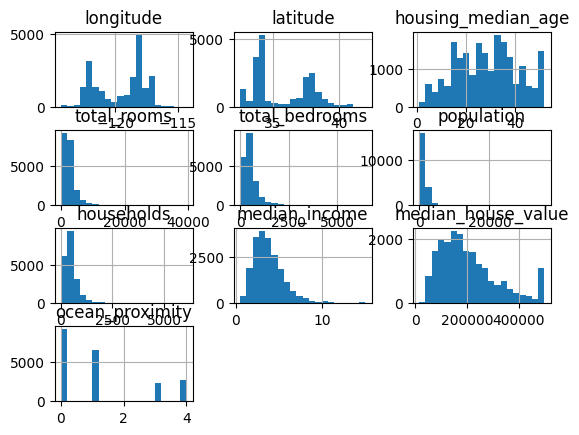

In [ ]:
housing.hist(bins=20)

In [ ]:
housing['population'].max()

35682.0

In [ ]:
housing['population'].min()

3.0

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):

    def __init__(self, attributes):
        self.attributes = attributes

    def fit(self,X=None, y=0):
        return self
    
    def transform(self, X,y=0):

        return X[self.attributes].values


In [ ]:
dataframe_selector = DataFrameSelector(attributes=categorical_attribute)

In [ ]:
dataframe_selector.fit_transform(housing)

array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ...,
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [ ]:
features = housing.drop('median_house_value',axis=1)
labels = housing['median_house_value'].copy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler

In [ ]:
class CustomEncoder(BaseEstimator, TransformerMixin):
    def fit(self,X=None, y=0):
        return self
    
    def transform(self, X,y=0):

        return np.array(LabelEncoder().fit_transform(X)).reshape(-1,1)


In [ ]:
categorical_pipeline = Pipeline([
    ('select_frame', DataFrameSelector(attributes=categorical_attribute)),
    ('label_encoder',CustomEncoder()),
    ('simple_imputer',SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_data_processed = categorical_pipeline.fit_transform(features)

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
categorical_data_processed

array([[ 1.2910888 ],
       [ 1.2910888 ],
       [ 1.2910888 ],
       ...,
       [-0.11673923],
       [-0.11673923],
       [-0.11673923]])

In [ ]:
numerical_attributes[:-1]

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [ ]:
numerical_pipeline = Pipeline([
    ('select_frame', DataFrameSelector(attributes=numerical_attributes[:-1])),
    ('simple_imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
numerical_attributes_processed = numerical_pipeline.fit_transform(features)

In [ ]:
numerical_attributes_processed

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.9744286 ,
        -0.97703285,  2.34476576],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.86143887,
         1.66996103,  2.33223796],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.82077735,
        -0.84363692,  1.7826994 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.3695372 ,
        -0.17404163, -1.14259331],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.60442933,
        -0.39375258, -1.05458292],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.03397701,
         0.07967221, -0.78012947]])

In [ ]:
from sklearn.pipeline import FeatureUnion

In [ ]:
full_pipeline = FeatureUnion([
    ('categorical_pipeline', categorical_pipeline),
    ('numerical_pipeline',numerical_pipeline)  
])

In [ ]:
all_attributes_processed = full_pipeline.fit_transform(features)

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
all_attributes_processed_df = pd.DataFrame(data=all_attributes_processed,columns=categorical_attribute+numerical_attributes[:-1])

In [ ]:
all_attributes_processed_df.head()

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.291089,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766
1,1.291089,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238
2,1.291089,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699
3,1.291089,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968
4,1.291089,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881


In [ ]:
all_attributes_processed_df['population'].max()

30.250330218731502

In [ ]:
all_attributes_processed_df['population'].min()

-1.2561225469018058

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(all_attributes_processed_df,labels, train_size=0.8, random_state=10)